In [32]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.circuit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-15 20:38:54,998: Credentials are already in use. The existing account in the session will be replaced.



# **Basic Quantum Circuit Creation ([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit))**
Quantum Circuits are the most important part of quantum computation. There are two methods for making a quantum circuit. We will start out with the simpler method as shown below:
```
'Circuit Code Name' = QuantumCircuit('# of Qubits', '# of Classical Bits', name = 'circuit name'...)
``` 
The above  code creates a quantum circuit, the three ' ' (aka parameters) inside the Quantum Circuit method are used to specify how to make the circuit. # of Qubits is basically neccesary, whereas the classical bits and name are optional, there are other parameters that are optional ([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit) ) are and mostly unused.

An extrememly simple example of a quantum circuit is given below:

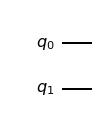

In [3]:
qc = QuantumCircuit(2)

qc.draw()

Above we can see that we are making a quantum circuit with the code name of qc that has two qubits.
q0 refers to qubit 0 and q1 refers to qubit 1; as we can see, there are two qubits.
The draw method will be explained later.

Below is a more complex example with classical bits and a circuit name, classical bits allow for measuring states in the computational basis (0's and 1's) or sometimes math (the name is not important, just be consistent):

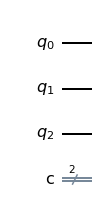

In [4]:
qc_complex = QuantumCircuit(3, 2, name = 'My Complex Circuit')

qc_complex.draw()

The classical bits are collated as no work is done directly to the classical bits.

# **Advanced Circuit Creation**
## **Register Basics ([Q LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumRegister.html)) ([C LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.ClassicalRegister.html))**

Instead of just giving the number of qubits, you can give it something called registers.

Registers are collections of bits with more customizability compared to just a number of bits, the code is given below:
```
'Quantum Register Code Name' = QuantumRegister('# of Qubits', name = 'Bit Name', bits = 'List of bits')
```
and
```
'Classical Register Code Name' = ClassicalRegister('# of Bits', name = 'Bit Name', bits = 'List of bits')
```

Here, the number of bits is like before. The name is a bit more different and useful, however as it changes the name in the draw method. An example will be given below. The bits section allows you to add individual bits to the register, not sure how useful this is *(Needs validation)*

After creating the registers, they can be used to make a circuit as such:
```
'Quantum Circuit Code Name' = QuantumCircuit('List of Quantum Registers', 'List of Classical Registers'...)
```

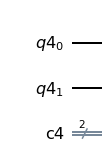

In [15]:
qr_simple = QuantumRegister(2)

cr_simple = ClassicalRegister(2)

qc_simple = QuantumCircuit(qr_simple, cr_simple, name = 'My Simple Quantum Circuit')

qc_simple.draw()

Below is a more complex example that utilizes the increased customizability:

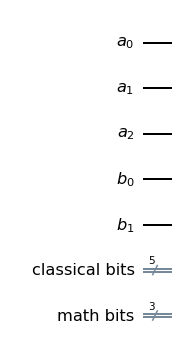

In [30]:
qr_complex_1 = QuantumRegister(3, name = 'a')

qr_complex_2 = QuantumRegister(2, name = 'b')

cr_complex_1 = ClassicalRegister(5, name = 'classical bits')

cr_complex_2 = ClassicalRegister(3, name = 'math bits')

qc_complex = QuantumCircuit(qr_complex_1, qr_complex_2, cr_complex_1, cr_complex_2, name = 'My Complex Register Circuit')

qc_complex.draw()

Notice how the qubits have different names in the circuit representation, a<sub>0</sub>, <sub>1</sub>, a<sub>2</sub>, b<sub>0</sub>, b<sub>1</sub>, classical bits, and math bits. These changes are almost entirely cosmetic.

(**NOTE** the name can never contain a capital letter first)

## **The Qubit ***in Universum*****

Creating indivdual qubits has not been used so far by our team but nonetheless here it is:

```
'Qubit Code Name' = Qubit('Register to be assigned to', 'Where in the register to place')
```

### **Qubit Attributes**

```
'Qubit Code Name'.register
```
Returns the register of the qubit
```
'Qubit Code Name'.index
```
Returns the index of a qubit in its register


QuantumRegister(2, 'q9')
0
Qubit 2 belongs to register QuantumRegister(2, 'q9') at index  1


/tmp/ipykernel_76/4214377669.py:8: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  print(qubit_1.register)
/tmp/ipykernel_76/4214377669.py:9: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  print(qubit_1.index)
/tmp/ipykernel_76/4214377669.py:10: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  print("Qubit 2 belongs to register %s at index %2d" % (qubit_2.register, qubit_2.index))


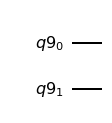

In [39]:
silly_Register = QuantumRegister(2)

qubit_1 = Qubit(silly_Register, 0)
qubit_2 = Qubit(silly_Register, 1)

silly_Circuit = QuantumCircuit(silly_Register)

print(qubit_1.register)
print(qubit_1.index)
print("Qubit 2 belongs to register %s at index %2d" % (qubit_2.register, qubit_2.index))

silly_Circuit.draw()

The deprecation errors seem to indicate that this is not very useful and the register should be inspected, not the individual qubits, lets get to it!

## **Register Attributes**

### **Name**
Registers have a couple of useful attributes as such:
```
'Register Code Name'.name
```
### **Prefix**
Returns the name of each qubit, ironically this is the "prefix" when drawing the circuit
```
'Register Code Name'.prefix
```
### **Size**
Seems to return the type of circuit, either q for quantum or c for classical (**Need Verification**)
```
'Register Code Name'.size
```
Returns the number of bits in the register (*very useful for iteration!*)

There are others that are a bit esoteric in the following link ([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumRegister.html))

Below are some examples using the complex registers made earlier, as with any attribute, when calling it you recieve the value, it is not a method that does something and as such you should print it:

In [41]:
print(qr_complex_1.name)

print(qr_complex_1.prefix)

print(qr_complex_1.size)

print("The register has the name of %s, is of type %s, and is of size %2d" % (cr_complex_1.name, cr_complex_1.prefix, cr_complex_1.size))

a
q
3
The register has the name of classical bits, is of type c, and is of size  5


## **Register Methods**
### **Index**
Registers have very few methods of which we have never used:
```
'Register Code Name'.index('Individual Bit you are searching for')
```
This gets the position of a particular bit in a register
### **QASM Code**
```
'Register Code Name'.qasm()
```
Returns the qasm string (*Needs more info*)

Here are some examples using the silly registers made before:

In [48]:
print(silly_Register.index(qubit_2))

silly_Register.qasm()

1


'qreg q9[2];'

## **Quantum Circuit Attributes**

Here is just a couple that seem useful, there are many more in this link ([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit)):
### **List of Classical Bits**
```
'Circuit Code Name'.clbits
```
Returns a list of the classical bits
### **List of Qubits**
```
'Circuit Code Name'.qubits
```
Returns a list of the qubits
### **Number of Classical Bits**
```
'Circuit Code Name'.num_clbits
```
Returns the number of classical bits
### **Number of Qubits**
```
'Circuit Code Name'.num_qbits
```
Returns the number of quantum bits (*Very Useful!*)
### **Name**
```
'Circuit Code Name'.name
```
Returns the name of the circuit
### **Data**
```
'Circuit Code Name'.data
```
Returns a lot of information about the circuit such as (*Need more info*)

Examples are given below using a new made up circuit:

In [56]:
attribute_Circuit = QuantumCircuit(2,2, name = "Cool Circuit")

print("The %s has %2d classical bits and %2d quantum bits" % (attribute_Circuit.name, attribute_Circuit.num_clbits, attribute_Circuit.num_qubits))

The Cool Circuit has  2 classical bits and  2 quantum bits


As the .qubits method returns a list of qubits in the circuit, we can chain commands or do something specific to a qubit as shown below:

In [58]:
print(attribute_Circuit.qubits[0].register)

QuantumRegister(2, 'q')


/tmp/ipykernel_76/1630621146.py:1: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  print(attribute_Circuit.qubits[0].register)


It doesn't seem to be useful in this case as not much can be done directly to the individual qubits but keep in mind this style of thinking for later.

## **Quantum Circuit Methods**

The methods listed here are just general purpose methods that specifically are not involved with creating gates and representation. The following links will take you to them:
([GATE LINK]()) and ([REPRESENTATION LINK]())
### **Add Bits**
```
'Circuit Code Name'.add_bits('List of Bit Code Names')
```
Adds individual bits to the circuit
### **Add a register(*s?*)**
```
'Circuit Code Name'.add_register('Register Code Name')
```
Adds a register to the circuit (*may be able to do multiple, needs more info*)
### **Copy**
```
'Circuit Code Name'.copy(name = 'Name to be given to the copy')
```
Returns a copy of the circuit 'Circuit Code Name'
### **Depth**
```
'Circuit Code Name'.depth('List of bits')
```
(*Needs more info*)
### **For Loop**
```
'Circuit Code Name'.for_loop(see link)
```
Seems very useful, see ([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.for_loop.html#qiskit.circuit.QuantumCircuit.for_loop))
### **Hamiltonian**
```
'Circuit Code Name'.hamiltonian('Operator', 'Time', Qubits)
```
(*Needs more info*)
### **Check if Has Register**
```
'Circuit Code Name'.has_register('Register Code Name')
```
Returns a true or false on whether or not a circuit has a particular register
### **Initialize**
```
'Circuit Code Name'.initialize(See Link)
```
Seems very useful, see ([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html#qiskit.circuit.QuantumCircuit.initialize)) (*PROVIDE IN DEPTH EXPLANATION PERHAPS IN SEPERATE SECTION LABELED CIRCUIT ADVANCED ALONG WITH OTHERS SUCH AS IF AND FOR AND WHILE*)
### **If**
```
'Circuit Code Name'.if_test(see link)
```
(*Needs more info*)([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.if_test.html#qiskit.circuit.QuantumCircuit.if_test))
### **If Else**
```
'Circuit Code Name'.if_else(see link)
```
(*Needs more info*)([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.if_else.html#qiskit.circuit.QuantumCircuit.if_else))
### **Power**
```
'Circuit Code Name'.power(see link)
```
(*Needs more info*)([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.power.html#qiskit.circuit.QuantumCircuit.power))
### **Prepare a State**
```
'Circuit Code Name'.prepare_state(see link)
```
(*Needs more info*)([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.prepare_state.html#qiskit.circuit.QuantumCircuit.prepare_state))
### **Repeat**
```
'Circuit Code Name'.repeat(see link)
```
(*Needs more info*)([LINK](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.repeat.html#qiskit.circuit.QuantumCircuit.repeat))
### **Reset Qubit**
```
'Circuit Code Name'.reset(Qubit)
```
Resets a qubit to its orignal state, this is most likely called as such:
``` 
'Circuit Code Name'.reset('Register Code Name'['Qubit Index'])
```
### **Size**
```
'Circuit Code Name'.size()
```
Returns the total number of instructions
### **Width**
```
'Circuit Code Name'.width()
```
Returns the total qubits and bits
### **To Gate**
```
'Circuit Code Name'.to_gate(label = 'Gate label)
```
Returns a gate that harbors all of the gates inside the circuit with an optional label that displays on drawing, this can be added to a macro circuit. This goes into the idea of sub-circuits and macro circuits. More information about gates and the aforementioned circuit types can be found here ([LINK]())
### **To Instruction**
```
'Circuit Code Name'.to_instruction(label = 'Instruction label')
```
Returns an instruction (*Needs more info*) with an optional label that displays on drawing, this can be (*Needs more info*). More information about instructions can be found here ([LINK]())

Try testing examples of methods in the empty box below:

To learn more about the next step in the journey, gates, go to this [LINK](), if you would like to go to the home page, click this [LINK](). Congrats!